In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

def compute_psnr(volume1, volume2, max_pixel_value=1.0):
    """
    Computes the PSNR (Peak Signal-to-Noise Ratio) between two volumes.
    
    Parameters:
    - volume1: The first volume (numpy array).
    - volume2: The second volume (numpy array).
    - max_pixel_value: The maximum possible pixel value of the data.
    
    Returns:
    - psnr: The PSNR value.
    """
    mse = np.mean((volume1 - volume2) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr




In [2]:
ref_file = '10_512.npy'
ref = np.load(ref_file)

In [3]:
volumes = [f for f in os.listdir() if (".npy" in f) and f != ref_file]
psnr_dict = {}

for v in volumes:
    v_name = v[:-4]
    psnr_dict[v_name] = compute_psnr(ref, np.load(v))
    print(f"PSNR ({v_name}): {psnr_dict[v_name]} dB")

psnr_dict.pop("sirt_walnut")

PSNR (8_64): 31.204958461325138 dB
PSNR (10_128): 33.820290993938706 dB
PSNR (2_128): 33.07603998047118 dB
PSNR (8_128): 33.4609334067352 dB
PSNR (sirt_walnut): 13.8525217872533 dB
PSNR (8_256): 33.50898002278687 dB
PSNR (4_128): 33.262849174696576 dB


13.8525217872533

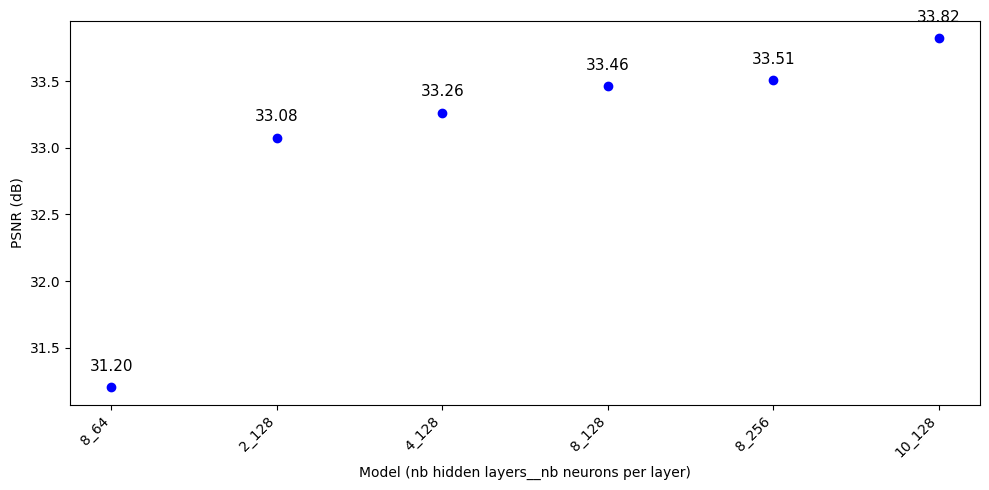

In [8]:
# Sort the dictionary by PSNR values
sorted_psnr = dict(sorted(psnr_dict.items(), key=lambda item: item[1]))

# Extract keys and values
keys = list(sorted_psnr.keys())
values = list(sorted_psnr.values())

# Plotting
# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(keys, values, color='blue')
plt.xlabel('Model (nb hidden layers__nb neurons per layer)')
plt.ylabel('PSNR (dB)')
plt.xticks(rotation=45, ha='right')

# Annotate each point with the PSNR value
for i, value in enumerate(values):
    plt.text(i, value+0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()